In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import sklearn.model_selection as model_selection

In [37]:
file=pd.read_csv('adatszet_A_csoport.csv', sep=';')

In [49]:
X = file.iloc[:, :11]
Y = file.iloc[:, 11]

Y = Y.apply(np.int64)
Y.dtypes

dtype('int64')

In [50]:
print(X.head())
print(Y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.30         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
0    6
1

In [51]:
#mennyi nan van
file.isnull().sum().sum()

0

In [52]:
#átlag a nan adatokhoz
means = [file[column].astype(float).mean() for column in file.columns]

for mean, column in zip(means, file.columns):
    file[column].replace(np.nan, round(mean,1), inplace = True)

In [53]:
# ellenőrzés hogy maradt-e nan benne
file.isnull().sum().sum()

0

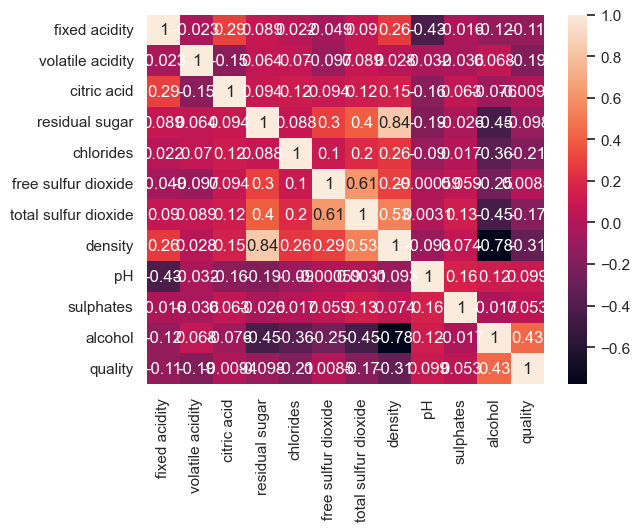

In [54]:
#heatmap
sns.heatmap(file.corr(), annot=True)
plt.show()

In [55]:
#felosztás
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [57]:
#LogisticRegression
estimators = []
estimators.append(('logistic1',LogisticRegression(C = 1, solver = 'newton-cg', tol=0.001, max_iter=100)))
estimators.append(('logistic2',LogisticRegression(C = 10, solver = 'lbfgs', tol=0.01, max_iter=100)))

ensemble = VotingClassifier(estimators, verbose=True)

results = model_selection.cross_val_score(ensemble,X,Y,cv=10)
print(results.mean())

ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test, Y_test))



C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


[Voting] ................ (1 of 2) Processing logistic1, total=   4.3s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   3.4s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s
[Voting] ................ (1 of 2) Processing logistic1, total=   4.0s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   4.2s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   3.7s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   4.4s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   3.1s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s
[Voting] ................ (1 of 2) Processing logistic1, total=   4.1s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   4.5s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (1 of 2) Processing logistic1, total=   3.4s


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s
0.4975614540294645
[Voting] ................ (1 of 2) Processing logistic1, total=   4.1s
[Voting] ................ (2 of 2) Processing logistic2, total=   0.2s
0.49081632653061225


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 309, in fit
    check_classification_targets(y)
  File "C:\Users\Gyuri\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_typ

NameError: name 'result' is not defined